<a href="https://colab.research.google.com/github/zubairali74/ivy/blob/master/Zubair_Transfer_Learning01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import platform
import numpy as np

In [5]:
!pwd

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [8]:
!wget https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/y9svrbh27n-1.zip

--2023-07-13 21:13:52--  https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/y9svrbh27n-1.zip
Resolving prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com)... 52.218.89.72, 3.5.71.181, 52.218.117.186, ...
Connecting to prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com)|52.218.89.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1126891364 (1.0G) [application/octet-stream]
Saving to: ‘y9svrbh27n-1.zip’

y9svrbh27n-1.zip    100%[===================>]   1.05G  32.0MB/s    in 44s     

2023-07-13 21:14:37 (24.5 MB/s) - ‘y9svrbh27n-1.zip’ saved [1126891364/1126891364]



In [17]:
import zipfile
zip_ref = zipfile.ZipFile('/content/y9svrbh27n-1.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [33]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
from keras.activations import softmax

activation = softmax
from keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)



In [ ]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

In [ ]:
conv_base.summary()

In [40]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(37,activation='softmax'))

In [ ]:
model.summary()

In [15]:
conv_base.trainable = False

In [19]:
pip install split-folders

In [23]:
import splitfolders
input_folder='PSL/'
# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio("PSL", output="PSL2",
    seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False) # default values

Copying files: 1509 files [00:11, 134.05 files/s]


In [24]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/PSL2/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/PSL2/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/PSL2/val',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)


Found 1207 files belonging to 37 classes.
Found 152 files belonging to 37 classes.
Found 150 files belonging to 37 classes.


In [25]:
# Normalize
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)
test_ds = test_ds.map(process)

In [41]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [42]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
38/38 [==============================] - 273s 6s/step - loss: 1.6634 - accuracy: 0.6197 - val_loss: 0.3798 - val_accuracy: 0.9067
Epoch 2/10
38/38 [==============================] - 230s 6s/step - loss: 0.2257 - accuracy: 0.9519 - val_loss: 0.1602 - val_accuracy: 0.9733
Epoch 3/10
38/38 [==============================] - 230s 6s/step - loss: 0.0853 - accuracy: 0.9876 - val_loss: 0.1074 - val_accuracy: 0.9800
Epoch 4/10
38/38 [==============================] - 231s 6s/step - loss: 0.0420 - accuracy: 0.9992 - val_loss: 0.0935 - val_accuracy: 0.9733
Epoch 5/10
38/38 [==============================] - 231s 6s/step - loss: 0.0253 - accuracy: 1.0000 - val_loss: 0.0732 - val_accuracy: 0.9800
Epoch 6/10
38/38 [==============================] - 229s 6s/step - loss: 0.0163 - accuracy: 1.0000 - val_loss: 0.0689 - val_accuracy: 0.9800
Epoch 7/10
38/38 [==============================] - 245s 6s/step - loss: 0.0123 - accuracy: 1.0000 - val_loss: 0.0747 - val_accuracy: 0.9733
Epoch 8/10
38

In [44]:
test_loss, test_accuracy = model.evaluate(test_ds)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

5/5 [==============================] - 26s 5s/step - loss: 0.0441 - accuracy: 0.9803
Test Loss: 0.04405900463461876
Test Accuracy: 0.9802631735801697


1/1 [==============================] - 0s 173ms/step
Predicted class: tf.Tensor([0], shape=(1,), dtype=int64)


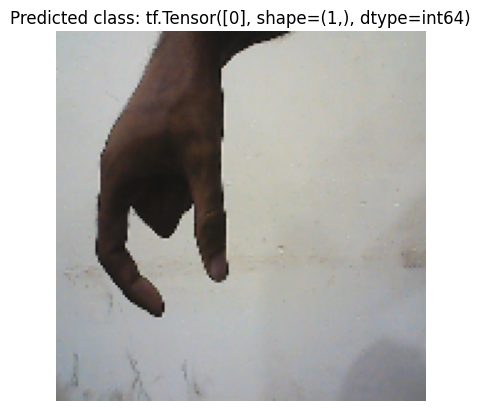

In [47]:
import matplotlib.pyplot as plt

# Load an individual test image
test_image = tensorflow.io.read_file('/content/PSL2/test/Ain ع/W_9.png')
test_image = tensorflow.image.decode_image(test_image, channels=3)
test_image = tensorflow.image.resize(test_image, (150, 150))
test_image = tensorflow.cast(test_image / 255., tensorflow.float32)
test_image = tensorflow.expand_dims(test_image, axis=0)

# Make predictions on the test image
predictions = model.predict(test_image)

# Get the predicted class
predicted_class = tensorflow.argmax(predictions, axis=1)

# Print the predicted class
print("Predicted class:", predicted_class)

# Display the test image
plt.imshow(test_image[0])
plt.title("Predicted class: " + str(predicted_class))
plt.axis('off')
plt.show()



1/1 [==============================] - 0s 177ms/step
Predicted class: tf.Tensor([2], shape=(1,), dtype=int64)


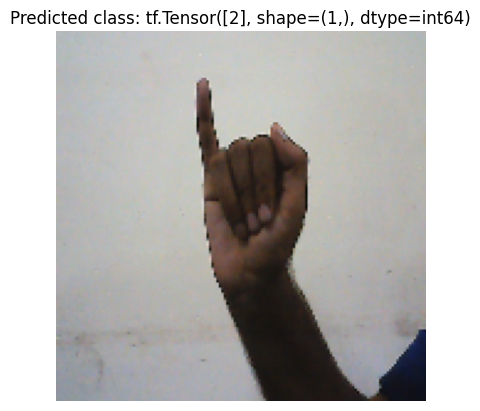

In [48]:
# Load an individual test image
test_image = tensorflow.io.read_file('/content/PSL2/test/Bari yeh ے/J_9.png')
test_image = tensorflow.image.decode_image(test_image, channels=3)
test_image = tensorflow.image.resize(test_image, (150, 150))
test_image = tensorflow.cast(test_image / 255., tensorflow.float32)
test_image = tensorflow.expand_dims(test_image, axis=0)

# Make predictions on the test image
predictions = model.predict(test_image)

# Get the predicted class
predicted_class = tensorflow.argmax(predictions, axis=1)

# Print the predicted class
print("Predicted class:", predicted_class)

# Display the test image
plt.imshow(test_image[0])
plt.title("Predicted class: " + str(predicted_class))
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 176ms/step
Predicted class: tf.Tensor([4], shape=(1,), dtype=int64)


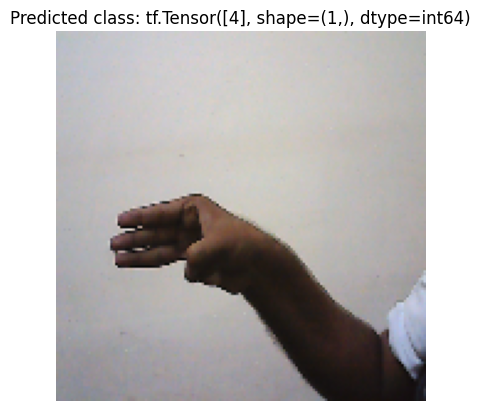

In [49]:
# Load an individual test image
test_image = tensorflow.io.read_file('/content/PSL2/test/Chay چ/H_9.png')
test_image = tensorflow.image.decode_image(test_image, channels=3)
test_image = tensorflow.image.resize(test_image, (150, 150))
test_image = tensorflow.cast(test_image / 255., tensorflow.float32)
test_image = tensorflow.expand_dims(test_image, axis=0)

# Make predictions on the test image
predictions = model.predict(test_image)

# Get the predicted class
predicted_class = tensorflow.argmax(predictions, axis=1)

# Print the predicted class
print("Predicted class:", predicted_class)

# Display the test image
plt.imshow(test_image[0])
plt.title("Predicted class: " + str(predicted_class))
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 174ms/step
Predicted class: tf.Tensor([12], shape=(1,), dtype=int64)


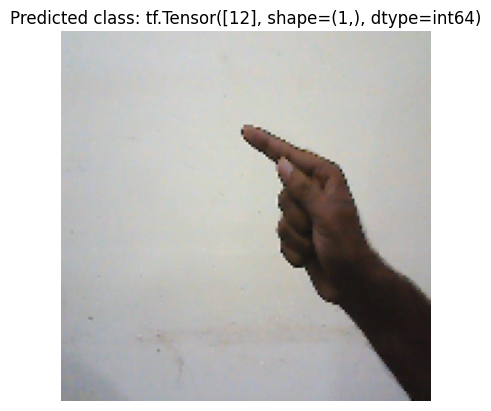

In [53]:
# Load an individual test image
test_image = tensorflow.io.read_file('/content/PSL2/test/Gaaf گ/B_9.png')
test_image = tensorflow.image.decode_image(test_image, channels=3)
test_image = tensorflow.image.resize(test_image, (150, 150))
test_image = tensorflow.cast(test_image / 255., tensorflow.float32)
test_image = tensorflow.expand_dims(test_image, axis=0)

# Make predictions on the test image
predictions = model.predict(test_image)

# Get the predicted class
predicted_class = tensorflow.argmax(predictions, axis=1)

# Print the predicted class
print("Predicted class:", predicted_class)

# Display the test image
plt.imshow(test_image[0])
plt.title("Predicted class: " + str(predicted_class))
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 245ms/step
Predicted class: tf.Tensor([17], shape=(1,), dtype=int64)


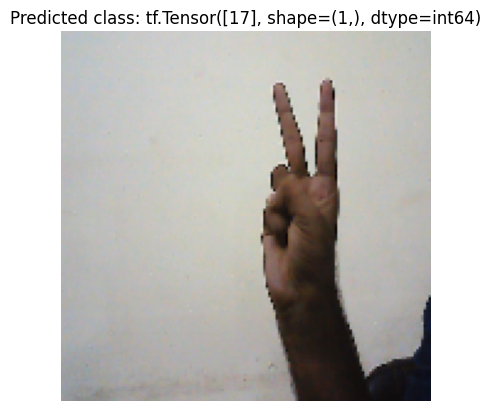

In [54]:
# Load an individual test image
test_image = tensorflow.io.read_file('/content/PSL2/test/aRay ڑ/N_9.png')
test_image = tensorflow.image.decode_image(test_image, channels=3)
test_image = tensorflow.image.resize(test_image, (150, 150))
test_image = tensorflow.cast(test_image / 255., tensorflow.float32)
test_image = tensorflow.expand_dims(test_image, axis=0)

# Make predictions on the test image
predictions = model.predict(test_image)

# Get the predicted class
predicted_class = tensorflow.argmax(predictions, axis=1)

# Print the predicted class
print("Predicted class:", predicted_class)

# Display the test image
plt.imshow(test_image[0])
plt.title("Predicted class: " + str(predicted_class))
plt.axis('off')
plt.show()